In [1]:
"""
Author https://github.com/boguss1225
Reference : https://github.com/calmisential/TensorFlow2.0_Image_Classification
"""
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import pandas as pd
import config
from utils.evaluate import eval_model
from utils.prepare_data import get_datasets, get_datasets_autosplit
from utils.pretrained_models import pretrained_model
import matplotlib.pyplot as pltget_datasets_autosplit
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


## Select GPU

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# os.environ["CUDA_HOME"]

# Set random seeds
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#os.environ['PYTHONHASHSEED'] = str(seed)
#os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [4]:
# GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Select Model

In [6]:
available_models=["Xception",
                  "EfficientNetB0", "EfficientNetB1", "EfficientNetB2",
                  "EfficientNetB3", "EfficientNetB4", "EfficientNetB5",
                  "EfficientNetB6", "EfficientNetB7",
                  "EfficientNetV2B0", "EfficientNetV2B1",
                  "EfficientNetV2B2", "EfficientNetV2B3",
                  "EfficientNetV2S", "EfficientNetV2M", "EfficientNetV2L",
                  "VGG16","VGG19",
                  "DenseNet121", "DenseNet169", "DenseNet201",
                  "NASNetLarge","NASNetMobile",
                  "InceptionV3","InceptionResNetV2"
                  ]

def get_model():
    model = pretrained_model(model_name="EfficientNetB0",
                            load_weight=None)

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  metrics=['accuracy', # add more metrics if you want
                            tf.keras.metrics.AUC(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            ])
    return model

## Load Data

In [7]:
# Load Data with manual data split
# train_generator, valid_generator, test_generator, \
# train_num, valid_num, test_num = get_datasets()

# Load Data with auto split
#train_generator, valid_generator, test_generator, \
#train_num, valid_num, test_num = get_datasets_autosplit()
set_num = 4
train_generator, val_generator, test_generator, train_num, valid_num, test_num = get_datasets(set_num)

Found 49231 images belonging to 5 classes.
Found 12500 images belonging to 5 classes.
Found 5099 images belonging to 5 classes.


In [8]:
"""
Apply image data augmentation in 'utils.prepare_data.py' manually
"""
config.image_height

32

## Visualize the data after augmentaion

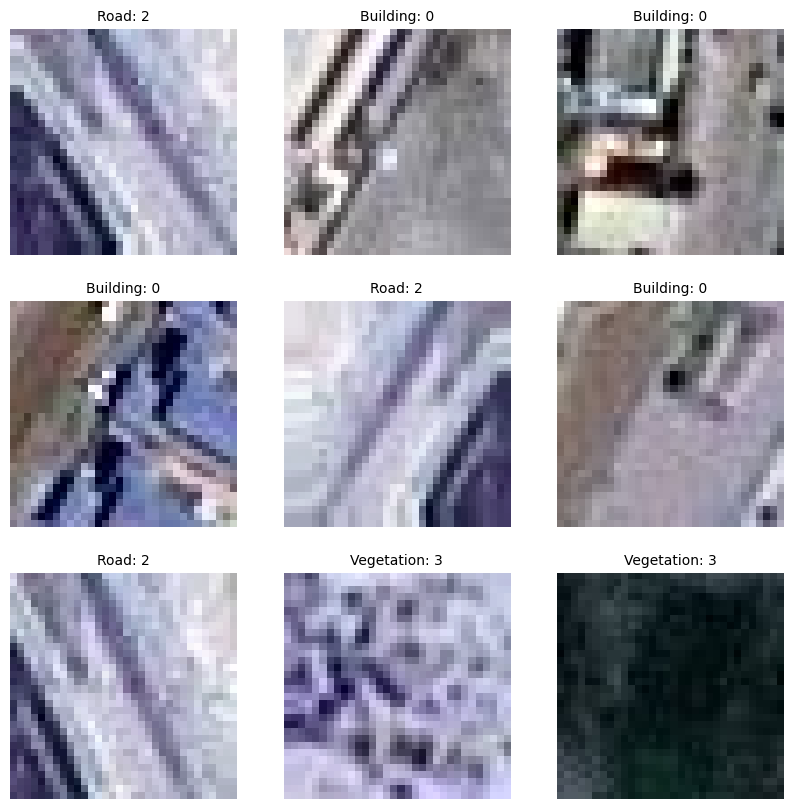

In [9]:
"""
Here are the first 9 images in the training dataset. 
Label 0 :Building
Label 1 :Land_(unpaved_area)
Label 2 :Road
Label 3 :Vegetation
Label 4 :Water
"""
if config.BATCH_SIZE > 9:
    range_val = 9
else:
    range_val = config.BATCH_SIZE

# Get the mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(range_val):
    ax = plt.subplot(3, 3, i + 1)
    img, label = next(train_generator)  # Get the image and label
    
    # Extract the numeric label (0~5)
    label_number = label[0].argmax()  # The label index (0~5)
    
    # Map the numeric label to the class name
    class_name = class_indices[label_number]
    
    # Display the image
    plt.imshow(img[0].astype("uint8"))
    
    # Show the full class name and label number
    plt.title(f"{class_name}: {label_number}", fontsize=10)
    plt.axis("off")

plt.show()



## Callbacks

In [10]:
"""
Callbacks
"""

# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='log')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=config.model_dir + config.model_save_name + "_best.weights.h5",  # Change extension to .weights.h5
    #filepath=config.model_dir+config.model_save_name+"_best.keras",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=20,
    restore_best_weights=True
)

callbacks = [
#     tensorboard, 
    model_checkpoint_callback, 
    early_stop_callback
]

In [11]:
model = get_model()
# tf.keras.utils.plot_model(model, show_shapes=True)

## Train the model

In [ ]:
# mkdir for model save path
if not os.path.exists(config.model_dir):
    os.makedirs(config.model_dir)

print("Start training:",config.train_dir)
print("Model:", config.model_save_name)

history = model.fit(train_generator,
                    epochs=config.EPOCHS,
                    steps_per_epoch=train_num // config.BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps=valid_num // config.BATCH_SIZE,
                    callbacks=callbacks,
                    #class_weight=class_weights  
                   )

Start training: D:/project_geo/code_test_combined/5folds_with_test_updated_combined_ver3/set_{set}/train
Model: EfficientNetB0
Epoch 1/300
384/384 [==============================] - 53s 119ms/step - loss: 0.5084 - accuracy: 0.8448 - auc: 0.9679 - precision: 0.8831 - recall: 0.8139 - val_loss: 19.3827 - val_accuracy: 0.4610 - val_auc: 0.7445 - val_precision: 0.5168 - val_recall: 0.3487
Epoch 2/300
384/384 [==============================] - 16s 43ms/step - loss: 0.3337 - accuracy: 0.8958 - auc: 0.9846 - precision: 0.9175 - recall: 0.8781 - val_loss: 1.1943 - val_accuracy: 0.6013 - val_auc: 0.8701 - val_precision: 0.7186 - val_recall: 0.5871
Epoch 3/300
384/384 [==============================] - 16s 42ms/step - loss: 0.2530 - accuracy: 0.9202 - auc: 0.9901 - precision: 0.9297 - recall: 0.9106 - val_loss: 1.3320 - val_accuracy: 0.7090 - val_auc: 0.8573 - val_precision: 0.7310 - val_recall: 0.6840
Epoch 4/300
384/384 [==============================] - 17s 44ms/step - loss: 0.2393 - accuracy

## Save Model

In [ ]:
# save the whole model
model.save(config.model_dir+config.model_save_name+"_last.h5")

In [ ]:
hist_df = pd.DataFrame(history.history)
with open(config.model_dir+"train_history1.csv", mode='w') as f:
    hist_df.to_csv(f)

## Evaluate Model

In [ ]:
# Evaluation
eval_model(model, set_num)

## Inference Example

In [ ]:
import numpy as np
def test_single_image(img_dir, model):
    img_raw = tf.io.read_file(img_dir)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=config.channels)
    img_tensor = tf.image.resize(img_tensor, [config.image_height, config.image_width])

    img_numpy = img_tensor.numpy()
    img_numpy = (np.expand_dims(img_numpy, 0))
    img_tensor = tf.convert_to_tensor(img_numpy, tf.float32)

#     img_tensor = img_tensor / 255.0 # uncomment if model included rescale preprocessing layer
    prob = model(tf.image.resize(img_tensor,[config.image_width,config.image_height]))

    
    probability = np.max(prob)

    classification = np.argmax(prob)
    return classification, probability

In [ ]:
# detect samples w last model
last_model = model
print(config.test_image_path)
classification_result, probability = test_single_image(config.test_image_path, last_model)
print("class : ",classification_result+1,"of",probability,"%")

In [ ]:
# detect samples w best model
# best_model = tf.keras.models.load_model(config.model_dir+config.model_save_name+"_best.h5")
best_model = get_model()
best_model.load_weights(config.model_dir+config.model_save_name+"_best.keras")
print(config.test_image_path)
classification_result, probability = test_single_image(config.test_image_path, best_model)
print("class : ",classification_result+1,"of",probability,"%")

In [ ]:
eval_model(best_model)